In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVR
import os
import geopandas as gpd
from tobler.area_weighted import area_interpolate
from tobler.dasymetric import masked_area_interpolate

In [31]:
path = os.getcwd()+ '\Dados vetoriais\Pontos amostrais_Piracicaba\Dados_227pts_original_06_03_2021.shp'
pontos_pira = gpd.read_file(path)

In [32]:
path2 = os.getcwd()+ '\Dados vetoriais\Piracicaba\Perimetro_Piracicaba.shp'
perimetro_pira = gpd.read_file(path2)

In [33]:
xizes = []
ypsolons = []

for geom in perimetro_pira.exterior:
    if(geom == None):
        continue
    xizes.append(geom.coords.xy[0])
    ypsolons.append(geom.coords.xy[1])

xizes = list(np.concatenate(xizes).flat)
ypsolons = list(np.concatenate(ypsolons).flat)

all_dots = [list(xy) for xy in zip(xizes, ypsolons)]

In [34]:
# split the data into featutes and target variable seperately
variaveis = pontos_pira.iloc[:, [1,2]].values # features set
argila = pontos_pira.iloc[:, 6].values # set of study variable

In [35]:
argila = argila.reshape(-1,1)

In [36]:
from sklearn.preprocessing import StandardScaler
StdS_X = StandardScaler()
StdS_y = StandardScaler()
variaveis = StdS_X.fit_transform(variaveis)
argila = StdS_y.fit_transform(argila)

In [37]:
# import the model
from sklearn.svm import SVR
# create the model object
regressor = SVR(kernel = 'rbf')
# fit the model on the data
regressor.fit(variaveis, argila.ravel())

SVR()

In [38]:
A=regressor.predict(StdS_X.transform(np.vstack((xizes, ypsolons)).T))
A

array([-0.66388731, -0.65168289, -0.64021833, ..., -0.61398522,
       -0.6139209 , -0.61459593])

In [39]:
path = os.getcwd()+ '\Dados vetoriais\Pontos amostrais_Piracicaba\Dados_227pts_original_06_03_2021.shp'
pontos_pira_gpd = gpd.read_file(path)

In [40]:
path2 = os.getcwd()+ '\Dados vetoriais\Piracicaba\Perimetro_Piracicaba.shp'
mapa_pira = gpd.read_file(path2)

<AxesSubplot:>

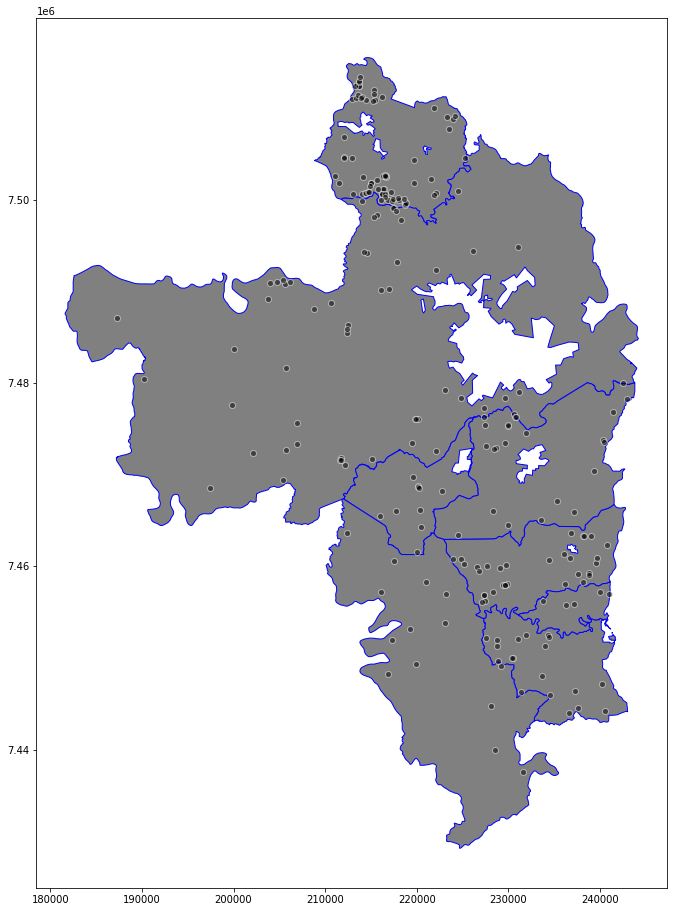

In [41]:
fig, ax = plt.subplots(figsize = (18,16))
mapa_pira.plot(color="gray",edgecolor="blue", ax=ax, legend=True)
pontos_pira_gpd.plot(color="black", edgecolor="white",  ax=ax, alpha=.5, legend=True)

In [59]:
from shapely.geometry import Polygon, Point
perimetro_pira_plot = gpd.GeoDataFrame(geometry = [Point(x, y) for x, y in all_dots], crs = mapa_pira.crs)

<AxesSubplot:>

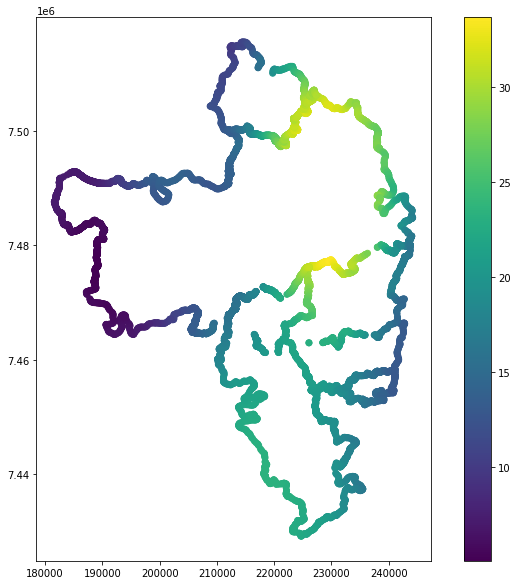

In [60]:
perimetro_pira_plot["Argila"] = StdS_y.inverse_transform(A.reshape(-1,1))
fig, ax = plt.subplots(figsize = (12,10))
perimetro_pira_plot.plot("Argila",ax=ax, legend=True)

In [52]:
interpolation = area_interpolate(
    source_df=perimetro_pira_plot,
    target_df=mapa_pira, 
    intensive_variables=["Argila"]
)

Text(0.5, 0.98, 'Argila')

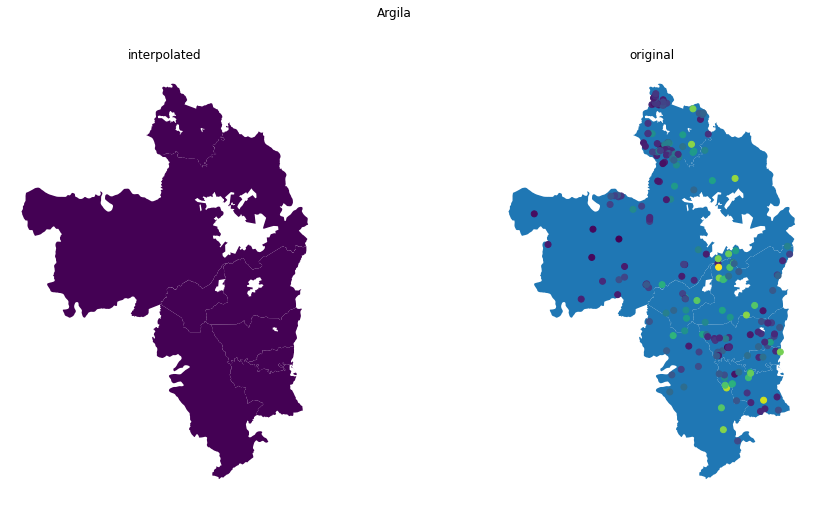

In [53]:
fig, ax = plt.subplots(1,2, figsize=(16,8))
interpolation.plot('Argila',ax=ax[0])
mapa_pira.plot(ax=ax[1])
pontos_pira_gpd.plot('Argila', ax=ax[1])
ax[0].set_title('interpolated')
ax[1].set_title('original')
for ax in ax:
    ax.axis('off')
fig.suptitle('Argila')